In [1]:
using DelimitedFiles
using Plots
using CoolProp

In [2]:
function fd!(dy,y,dt)
    dy[2:end-1] = (y[3:end] - y[1:end-2]) ./ (2dt)
    dy[1] = (y[2] - y[1]) ./ dt
    dy[end] = (y[end] - y[end-1]) ./ dt
    
#     dy[1:end-1] = (y[2:end] - y[1:end-1]) ./ (dt)
#     dy[end]     = (y[end] - y[end-1]) ./ dt
    
#     dy[2:end] = (y[2:end] - y[1:end-1]) ./ (dt)
#     dy[1]     = (y[2] - y[1]) ./ dt
    
    dy
end

fd! (generic function with 1 method)

In [3]:
matrix = readdlm("results.csv",',')
matrix[1,:]

15-element Vector{Any}:
 "t [s]"
 "P [Pa]"
 "T [K]"
 "D [kg/m^3]"
 "Hlv [J/kg]"
 "Volume [m^3]"
 "Mass [kg]"
 "X1 [m]"
 "X2 [m]"
 "V1 [m/s]"
 "V2 [m/s]"
 "dMdt [kg/s]"
 "dVolume/dt [m^3/s]"
 "covered percentage"
 "bubble label"

In [4]:
matrix[2:end,end-3] = dMdt

LoadError: UndefVarError: dMdt not defined

In [5]:
data = Float64.(matrix[2:end,:]);
dt = data[2,1] - data[1,1];

In [7]:
dMdt = data[:,12];
dVdt = data[:,13];
M = data[:,7];
T = data[:,3];
P = data[:,2];
D = data[:,4];
Volume = data[:,6];
dTdt = fd!(zero(T),T,dt)
UMASS = PropsSI.("UMASS", "T", T, "Q", 1.0, "Butane");
dUdt = fd!(zero(UMASS),UMASS,dt)
Ufilm = PropsSI.("UMASS", "T", T, "Q", 0.0, "Butane");
dUfilmdt = fd!(zero(Ufilm),Ufilm,dt)
# Mfilm = data[:,8];
CVMASS = PropsSI.("CVMASS", "T", T, "Q", 1.0, "Butane");
CPMASS = PropsSI.("CPMASS", "T", T, "Q", 1.0, "Butane");
dDdt = fd!(zero(D),D,dt)
H = PropsSI.("H", "T", T, "Q", 1.0, "Butane");
R = PropsSI.("GAS_CONSTANT", "T", T, "Q", 1.0, "Butane")
MolarM = PropsSI.("M", "T", T, "Q", 1.0, "Butane")
Hfg = data[:,5]
v = 1 ./ D;
Rm = R ./ MolarM;

dMdt_fd = fd!(zero(M),M,dt)

25001-element Vector{Float64}:
 -2.6469779601696886e-19
  8.32801688230083e-10
  2.4606192233599998e-9
  4.014757306008379e-9
  5.4989519979969786e-9
  6.916834241579476e-9
  8.271911074500628e-9
  9.567544018612368e-9
  1.080692747060748e-8
  1.199306965846902e-8
  1.3128778319201957e-8
  1.4216652717268197e-8
  1.5259083026252517e-8
  ⋮
  6.294262793443376e-7
  6.69203662037768e-7
  6.917311575179964e-7
  6.955260096119673e-7
  6.853722461138454e-7
  6.646285081342447e-7
  6.388689373375956e-7
  6.160950924761828e-7
  6.017671456578895e-7
  5.964483917636847e-7
  5.98319901672259e-7
  6.00705503429362e-7

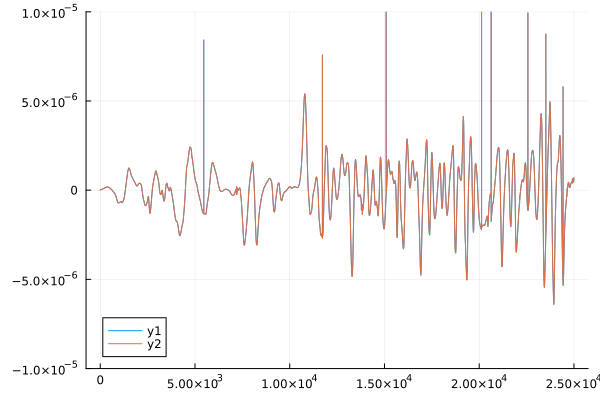

In [8]:
plot(dMdt)
plot!(dMdt_fd,ylim=(-1e-5,1e-5))

In [20]:
scatter(dMdt,dVdt,xlim=(-1e-5,1e-5),ylim=(-3e-6,3e-6),label="corrected dMdt v.s. dVdt",xlabel="dMdt",ylabel="dVdt")

savefig("corrected dMdt v.s. dVdt.pdf")

"/Users/yuxuanli/Documents/GitHub/ComputationalHeatTransfer.jl/examples/corrected dMdt v.s. dVdt.pdf"

In [ ]:
plot(Mfilm .* dUfilmdt + M .* dUdt - dMdt .* P .* (1 ./ D) - P .* dVdt, label="missing term")
# # plot!(- P .* dVdt)
plot!(Hfg .* dMdt, label="mdot Hfg")

In [ ]:
plot(data[:,1],sign.(V1),xlim=(7.3,8.3))

In [ ]:
plot(data[:,1],sign.(dMdt),xlim=(7.3,8.3))

In [ ]:
plot(P)

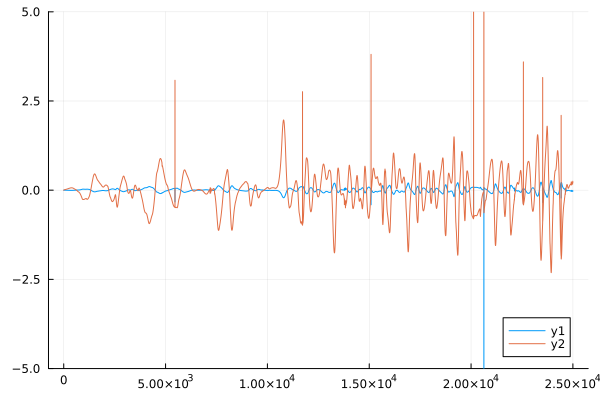

In [13]:
plot(-P .* dVdt)
plot!(Hfg .* dMdt,ylim=(-5,5))

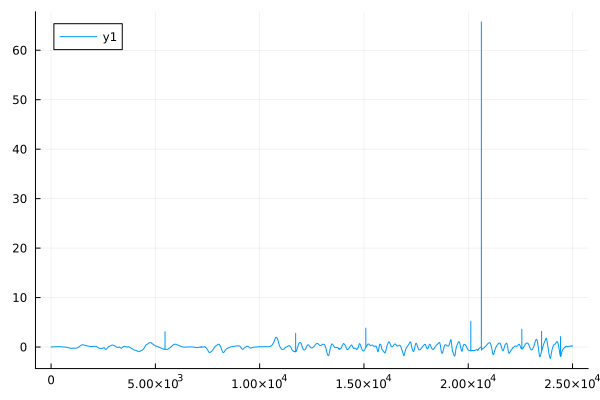

In [ ]:
plot(Hfg .* dMdt)

In [ ]:
plot(M .+ Mfilm, label="Mvapor + Mfilm (effect of Mdot film)")
# plot!(Mfilm)

In [ ]:
plot(data[:,16])

In [ ]:
RHS_1 = dMdt .* (H-UMASS) -P .* dVdt;

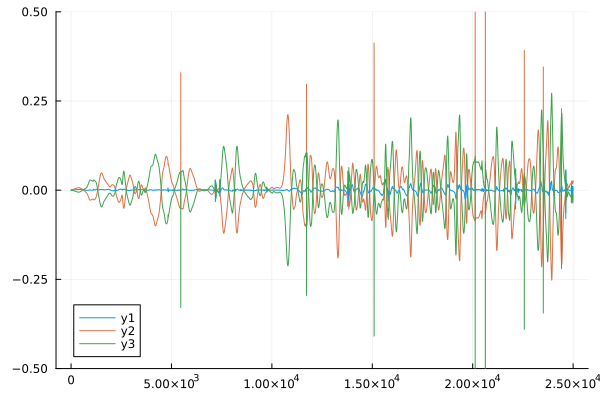

In [21]:
plot(M .* dUdt) 
# plot!(RHS_1)
plot!(dMdt .* (H-UMASS))
plot!( -P .* dVdt,ylim=(-0.5,0.5))

In [15]:
RHS_2 = dMdt .* Rm .* T .- P .* dVdt;

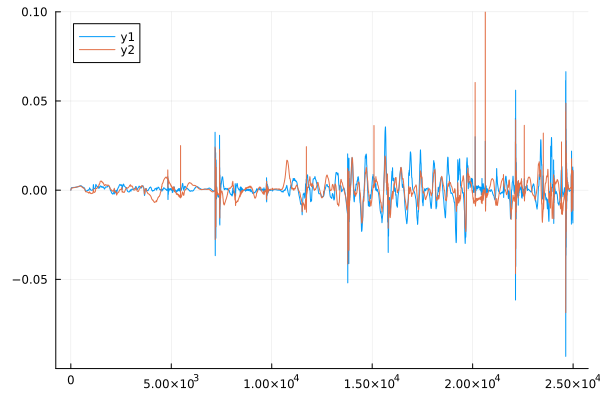

In [17]:
plot(M .* CVMASS .* dTdt)
# # plot(M .* dUdt)

# plot!(P .* dVdt)
# plot!(dMdt .* (H-UMASS))
plot!(RHS_2,ylim=(-0.1,0.1))

In [ ]:
CVMASS = PropsSI("CVMASS", "T", 293, "Q", 1.0, "Butane")

In [ ]:
cp = PropsSI("CPMASS", "T", 300, "Q", 1.0, "Butane")
K  = PropsSI("CONDUCTIVITY", "T", 300, "Q", 1.0, "Butane")
ρ  = PropsSI("D", "T", 300, "Q", 1.0, "Butane")

In [ ]:
K

In [ ]:
α = K/cp/ρ
d = 5e-4

In [ ]:
d^2/α

In [ ]:
(3.97651321878369E-07-3.96708449441115E-07)/4e-4